In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = pd.read_csv("tips(2).csv")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.corr()

ValueError: could not convert string to float: 'Female'

In [ ]:
sum(tips.tip,tips.size)

In [5]:
?sum()

Object `sum()` not found.


#### Ques:1 What is overall average tip

In [6]:
tips.tip.mean()

2.99827868852459

#### Therefore overall average tip is approximately 3

#### Ques:2 Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?


In [7]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

#### Since mean and median doesn't have significant difference we can say that tip field probably doesn't have any outliers.

#### Ques:3 Prepare a boxplot for 'tip', are there any outliers?


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

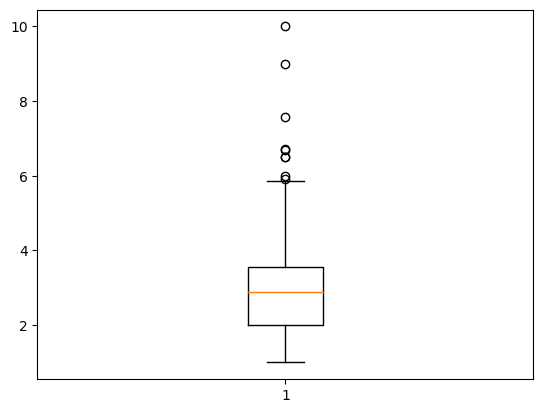

In [9]:
plt.boxplot(x=tips['tip'])
plt.show()

In [10]:
tips[tips.tip>=8]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


#### Yes, tip field contains Outliers

#### Ques:4 Prepare a boxplot for 'total_bill', are there any outliers?


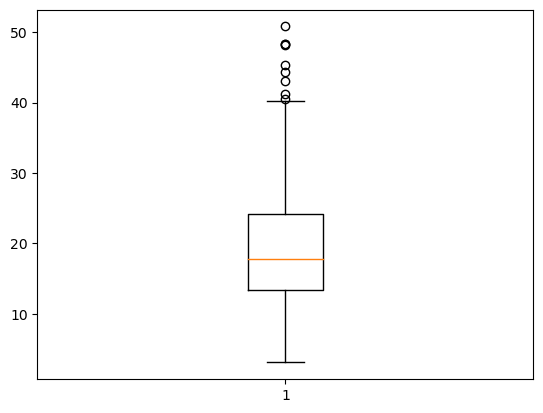

In [11]:
plt.boxplot(x=tips['total_bill'])
plt.show()

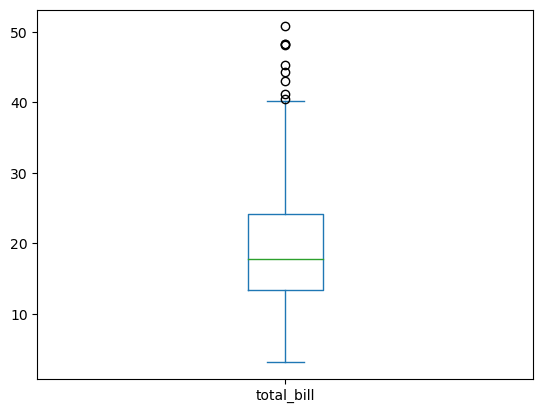

In [12]:
tips.total_bill.plot.box()
plt.show()

#### Yes, total_bill field contains Outliers

#### Ques:5 Gender: what is the percent of females in the data? 


In [13]:
tips.sex.value_counts(normalize = True)

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

#### Their are 35.65% Females

#### Ques:6 Prepare a bar plot with the bars representing the percentage of records for each gender.

In [14]:
freqs = tips.sex.value_counts(normalize = True )
freqs

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

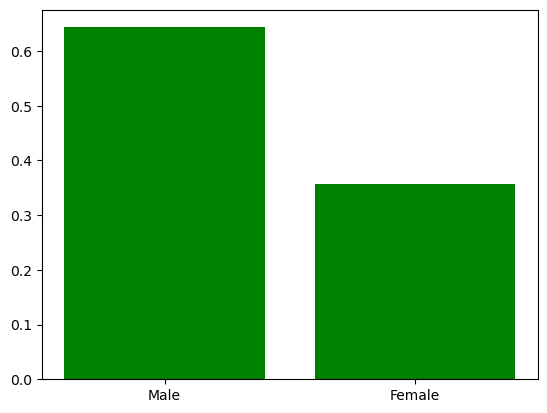

In [15]:
plt.bar(freqs.index, freqs.values, color="green")
plt.show()

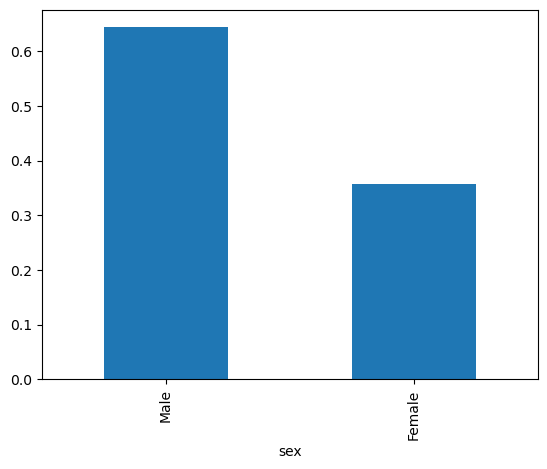

In [16]:
tips.sex.value_counts(normalize=True).plot.bar()
plt.show()

#### Ques:7 Does the average tip differ by gender? Does one gender tip more than the other?

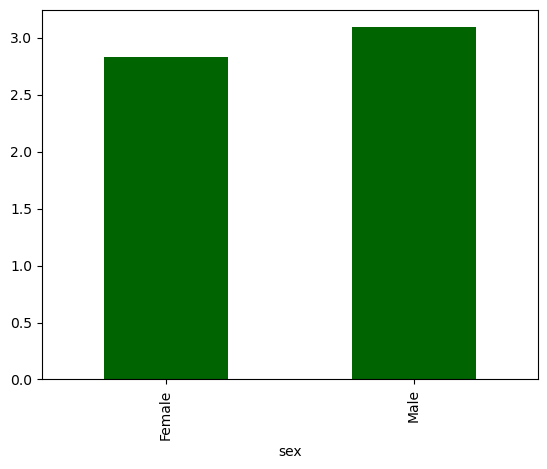

In [17]:
tips.groupby(['sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, the average tip slightly differs by gender. Male tip slightly more than female


#### Ques:8 Does the average tip differ by the time of day?


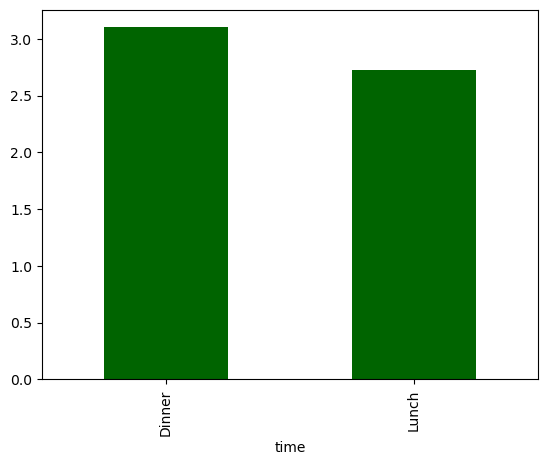

In [18]:
tips.groupby(['time'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes,people give more tip during Dinner compared to Lunch


#### Ques:9 Does the average tip differ by size (number of people at the table)? 


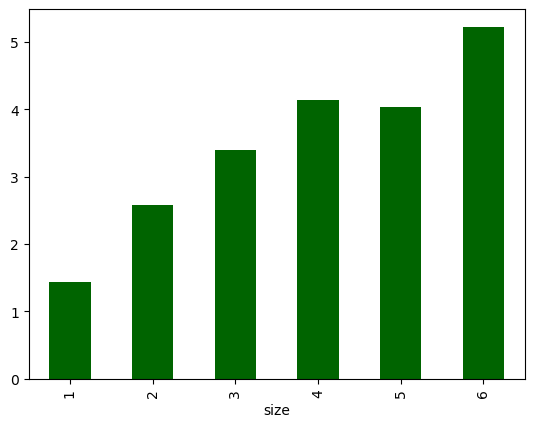

In [19]:
tips.groupby(['size'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, more the number of people, higher the tip.

#### Ques10: Do smokers tip more than non-smokers?


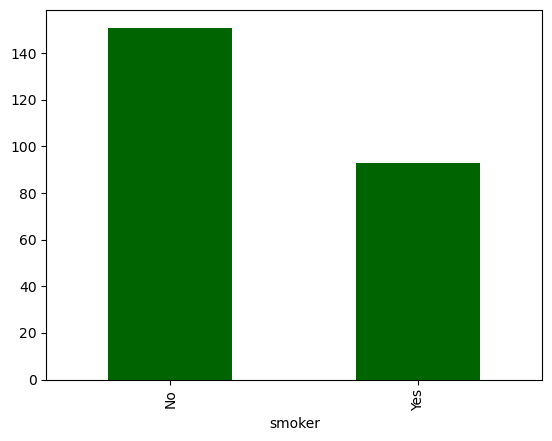

In [20]:
tips.groupby(['smoker'])['tip'].count().plot.bar(color="darkgreen")
plt.show()

#### No, smokers tip less than non-smoker

#### Ques:11 Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?


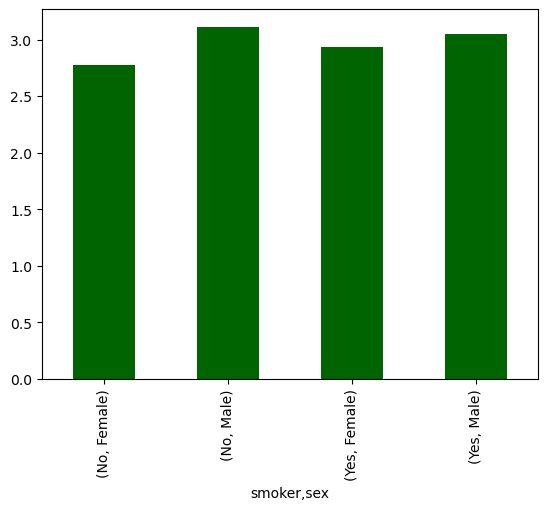

In [21]:
tips.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

In [22]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()


sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [23]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [24]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip',aggfunc=np.median)

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


#### 20th qunatile

In [25]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip',aggfunc= lambda x:np.quantile(x,0.2))

smoker,No,Yes
sex,,
Female,1.752,2.0
Male,2.000,2.0


#### The group with Male and Non-smoker tips the most. Also group with Male and smoker tips slightly less than group with Male non-smoker

#### Ques:12 Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.


In [26]:
tips.insert(2,"pct_tip",tips.tip/tips.total_bill)

In [27]:
tips.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4


#### Ques:13 Does pct_tip differ by gender? Does one gender tip more than the other?


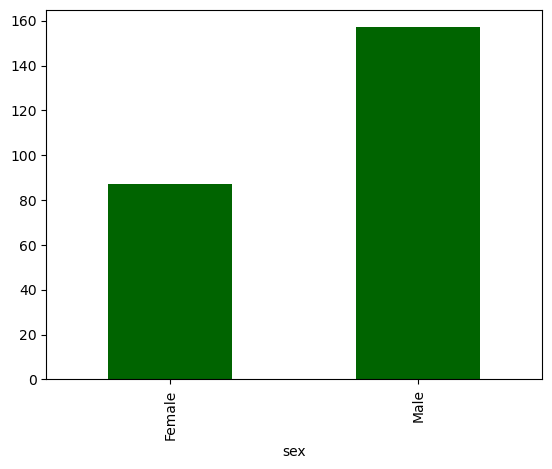

In [28]:
tips.groupby(['sex'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

In [29]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


#### Yes, the pct_tip differs by gender. Male tip more than female.

#### Ques:14 Does pct_tip differ by size (number of people at the table)? 


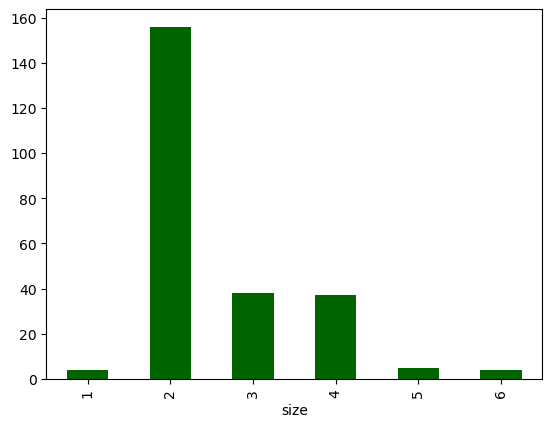

In [30]:
tips.groupby(['size'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

#### Yes, pct_tip do differ by size. The table with size 2 gives maximum pct_tip

#### Ques:15 Make the gender vs. smoker view using pct_tip  - does your inference change?


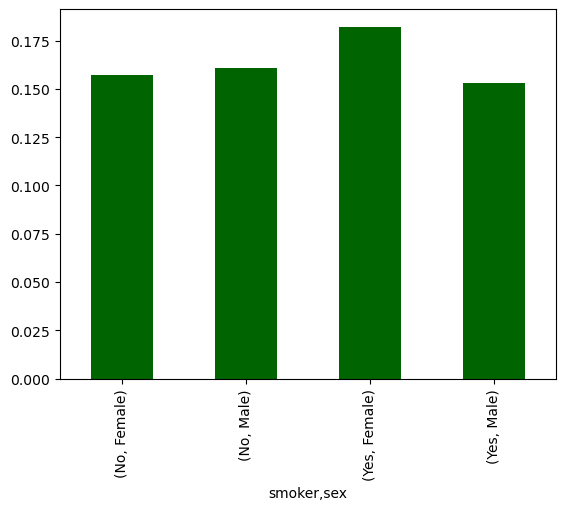

In [31]:
tips.groupby(['smoker','sex'])['pct_tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, group with Female smoker gives more average pct_tip

#### Ques:16 Make a scatter plot of total_bill vs. tip.


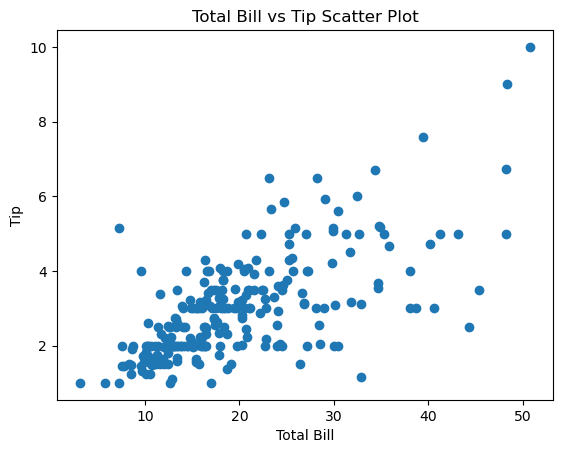

In [32]:
plt.scatter(x='total_bill', y='tip', data = tips)
plt.xlabel('Total Bill')              # label = name of label
plt.ylabel('Tip')
plt.title('Total Bill vs Tip Scatter Plot')            # title = title of plot
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

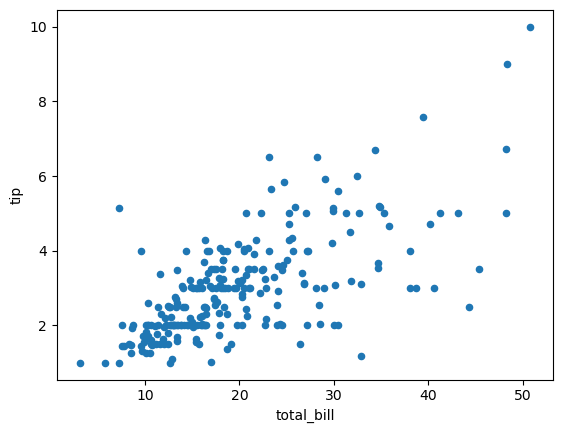

In [33]:
tips.plot.scatter(x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

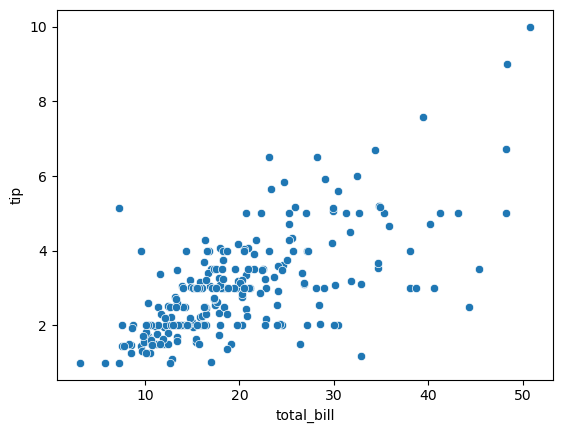

In [34]:
sns.scatterplot(x='total_bill', y='tip', data = tips)

#### Thus, higher the amount of bill, higher the tip

#### Ques:17 Make a scatter plot of total_bill vs. pct_tip.


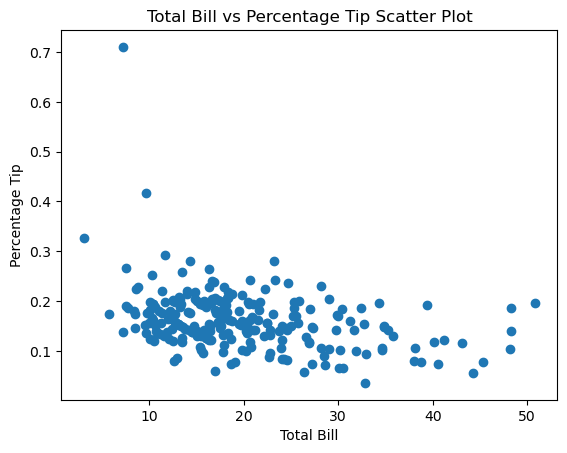

In [35]:
plt.scatter(x='total_bill', y='pct_tip', data = tips)
plt.xlabel('Total Bill')              # label = name of label
plt.ylabel('Percentage Tip')
plt.title('Total Bill vs Percentage Tip Scatter Plot')            # title = title of plot
plt.show()

<Axes: xlabel='total_bill', ylabel='pct_tip'>

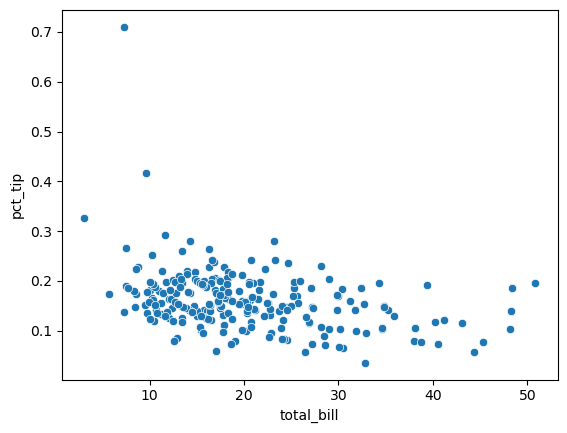

In [36]:
sns.scatterplot(x='total_bill', y='pct_tip', data = tips)

<Axes: xlabel='total_bill', ylabel='pct_tip'>

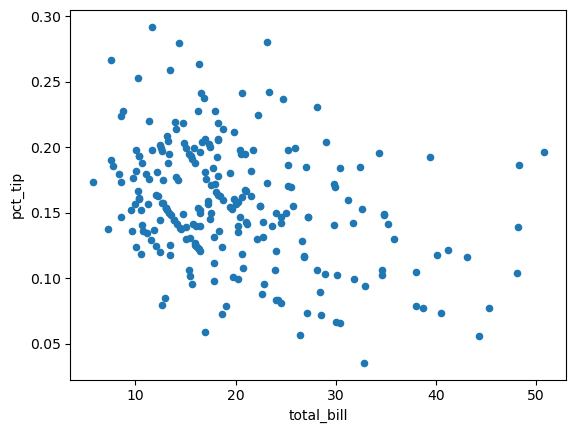

In [37]:
tips[tips.pct_tip<=0.3].plot.scatter(x='total_bill', y='pct_tip')

#### Thus, higher the amount of bill doesn't make much difference to pct_bill

#### Heat Map

ValueError: could not convert string to float: 'Female'

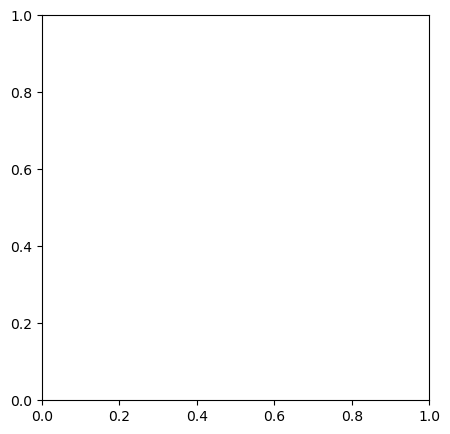

In [38]:
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(tips.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Line Plot

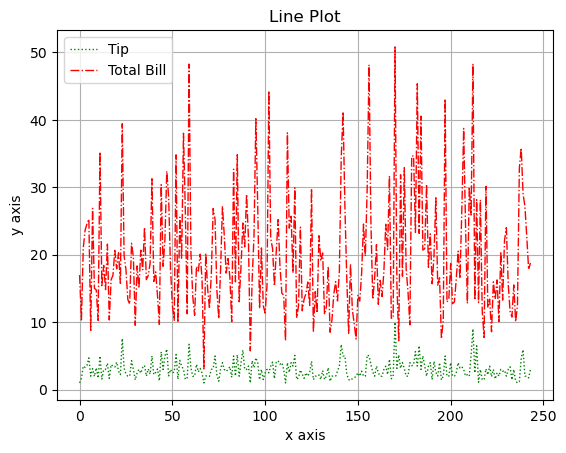

In [39]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
tips.tip.plot(kind = 'line', color = 'g',label = 'Tip',linewidth=1,alpha = 1,grid = True,linestyle = ':')
tips.total_bill.plot(color = 'r',label = 'Total Bill',linewidth=1, alpha = 1,grid = True,linestyle = '-.')
plt.legend(loc='best')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')         # title = title of plot
plt.show()

#### Filtering dataframe

In [40]:
x = tips['total_bill']>45     # There are only 5 fiels who have higher total_bill value than 45
tips[x]

,total_bill,tip,pct_tip,sex,smoker,day,time,size
59,48.27,6.73,0.139424,Male,No,Sat,Dinner,4
156,48.17,5.00,0.103799,Male,No,Sun,Dinner,6
170,50.81,10.00,0.196812,Male,Yes,Sat,Dinner,3
182,45.35,3.50,0.077178,Male,Yes,Sun,Dinner,3
212,48.33,9.00,0.186220,Male,No,Sat,Dinner,4


In [41]:
(tips.total_bill>48) & (tips.tip > 5)

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [42]:
tips.loc[(tips.total_bill>48) & (tips.tip > 5)]

,total_bill,tip,pct_tip,sex,smoker,day,time,size
59,48.27,6.73,0.139424,Male,No,Sat,Dinner,4
170,50.81,10.00,0.196812,Male,Yes,Sat,Dinner,3
212,48.33,9.00,0.186220,Male,No,Sat,Dinner,4


#### Ploting all data

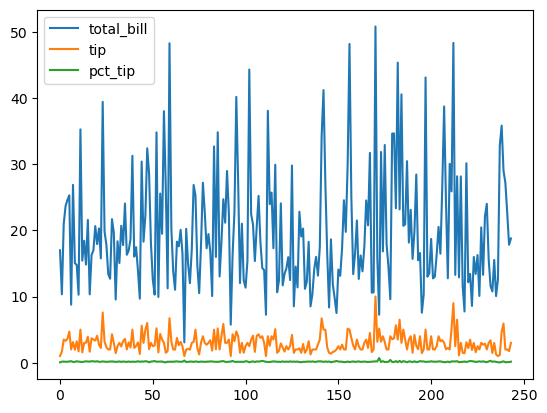

In [43]:
# Plotting all data 
tips1=tips.loc[:,["total_bill","tip","pct_tip"]]
tips1.plot()
plt.show()

#### Sub-Plots

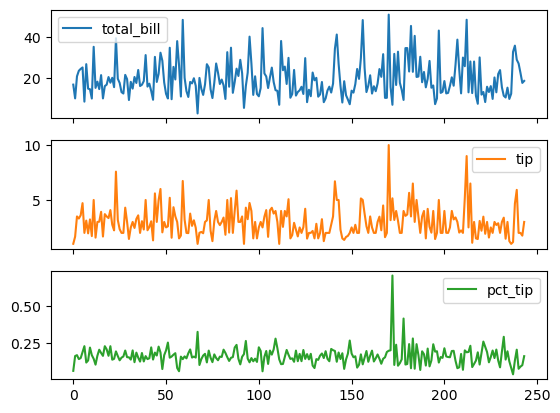

In [44]:
# subplots
tips1.plot(subplots = True)
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

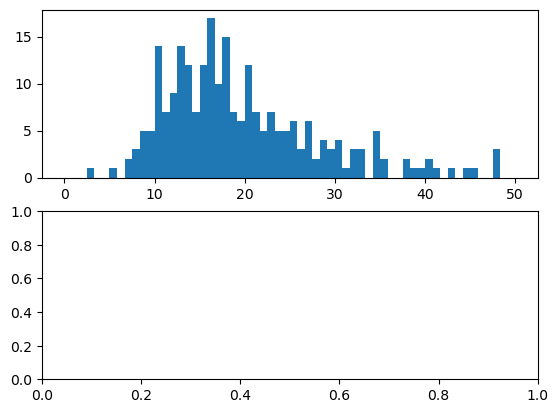

In [45]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
tips1.plot(kind = "hist",y = "total_bill",bins = 60,range= (0,50),normed = True,ax = axes[0])
tips1.plot(kind = "hist",y = "total_bill",bins = 60,range= (0,50),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt.show()

#### Use SEABORN

In [46]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='tip', ylabel='Density'>

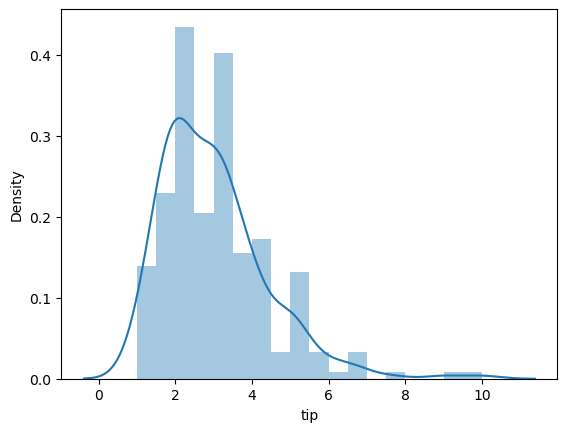

In [47]:
sns.distplot(tips.tip)

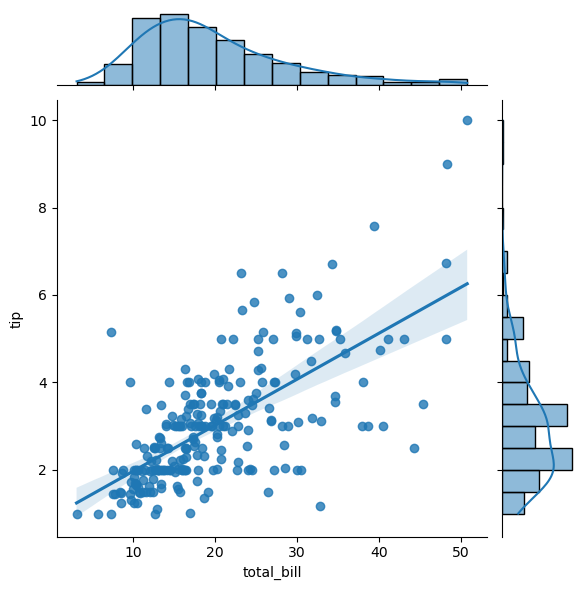

In [48]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind="reg")
plt.show()

In [49]:
tips.columns

Index(['total_bill', 'tip', 'pct_tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

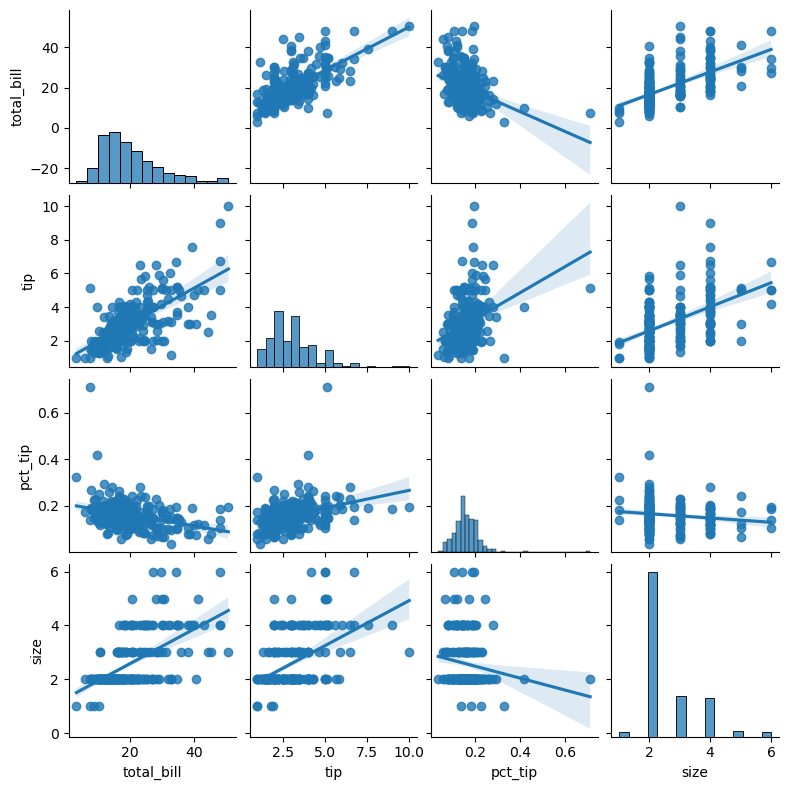

In [50]:
sns.pairplot(data=tips,kind="reg", size=2)
plt.show()

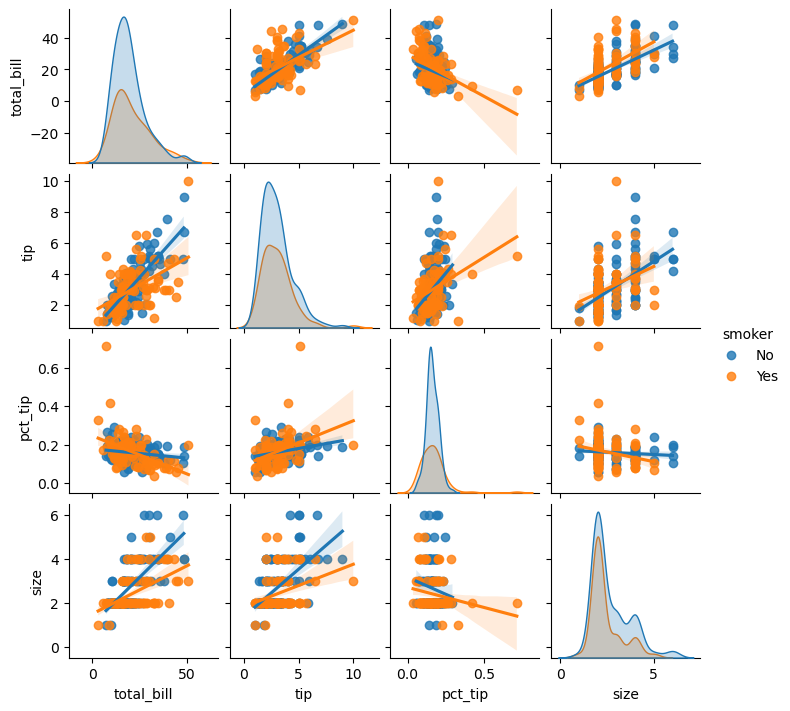

In [51]:
sns.pairplot(data=tips,kind="reg", size=1.8, hue="smoker")
plt.show()

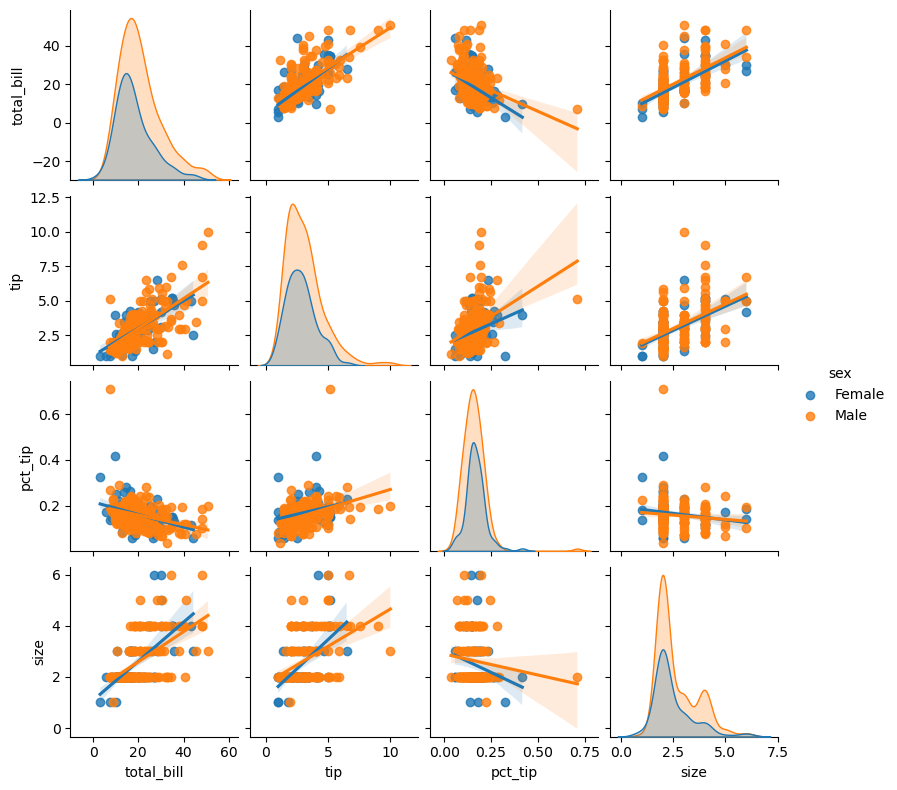

In [52]:
sns.pairplot(data=tips,kind="reg", size=2, hue="sex")
plt.show()

In [53]:
res=pd.pivot_table(data=tips,index="day",columns="size",values="tip")

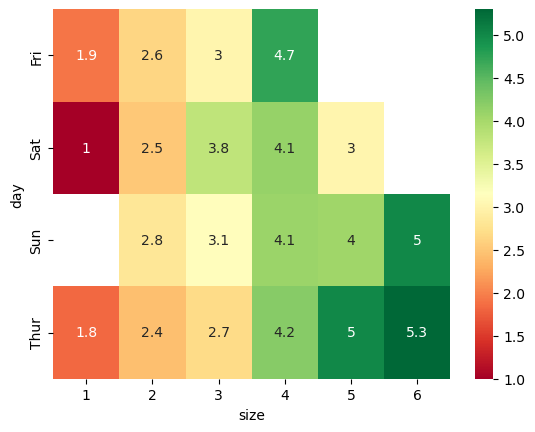

In [54]:
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()